In [1]:
import numpy as np
import matplotlib.pyplot as plt
import struct
import pickle #To use cifar-10

%matplotlib inline


In [2]:
#Load trainset_CIFAR_10
#https://www.cs.toronto.edu/~kriz/cifar.html
def unpickle_trainset_CIFAR_10(file):
    dicts = dict()
    for i in range(1, 6):   #This dataset is divided into 5 files.
        if i == 1:
            file_dict = pickle.load(open(file + str(i), 'rb'), encoding = 'bytes')
            dicts[b'data'] = file_dict[b'data']
            dicts[b'labels'] = file_dict[b'labels']
        else:
            file_dict = pickle.load(open(file + str(i), 'rb'), encoding = 'bytes')
            dicts[b'data'] = np.concatenate((dicts[b'data'], file_dict[b'data']))
            dicts[b'labels'] += file_dict[b'labels']
    return dicts

#Load testset_CIFAR_10
def unpickle_testset_CIFAR_10(file):
    dicts = pickle.load(open(file, 'rb'), encoding = 'bytes')
    return dicts

#Load MNIST
#http://yann.lecun.com/exdb/mnist/
def unpickle_MNIST(image, label):
    #Read Image data
    image_set = open(image, 'rb')
    magic_number = struct.unpack(">i", image_set.read(4))[0]
    number_images = struct.unpack(">i", image_set.read(4))[0]
    rows = struct.unpack(">i", image_set.read(4))[0]
    cols = struct.unpack(">i", image_set.read(4))[0]
    image_set_data = np.reshape(np.fromstring(image_set.read(), dtype = np.uint8), (number_images, rows * cols))
    image_set.close()
    #Read Label data
    label_set = open(label, 'rb')
    magic_number = struct.unpack(">i", label_set.read(4))[0]
    number_of_items = struct.unpack(">i", label_set.read(4))[0]
    label_set_data = np.reshape(np.fromstring(label_set.read(), dtype = np.uint8), (number_of_items))
    label_set.close()    
    return image_set_data, label_set_data

In [3]:
#K_Nearest_Neighbor
class K_Nearest_Neighbor():
    def __init__(self):
        pass
    
    def train(self, Xtrain, ytrain): #Set training set
        """
        Argument and store:
        Xtrain -- training_data
        ytrain -- training_label
        """
        self.Xtrain = Xtrain
        self.ytrain = ytrain
    
    def predict(self, k, Xtest_one): #Predict one test image
        """
        Argument:
        k -- size of training samples nearest from Xtest_one
        Xtest_one -- one test data

        Returns:
        count -- predicted label
        """
        distance = np.sum((self.Xtrain - Xtest_one) ** 2, axis = 1) ** (1 / 2) #L2 distance
        ordered_label = self.ytrain[distance.argsort()] #Sorting label data based on distance.
        count = np.argmax(np.bincount(ordered_label[:k]))
        #count = value of most counted label (np.bincount([1, 1, 2, 4]) -> [0, 2, 1, 0, 1]), np.argmax([0, 2, 1, 0, 1]) -> 1)
        return count
    
    def accuracy(self, k, Xtest, ytest): #Calculate accuracy of classifier
        """
        Argument:
        k -- size of training samples nearest from Xtest_one
        Xtest -- test_data
        ytest -- test_label

        Returns:
        np.mean(y_pred == ytest) -- accuracy
        """
        y_pred = np.zeros(Xtest.shape[0], dtype = self.ytrain.dtype)
        for i in range(Xtest.shape[0]):
            if i % 50 == 0:
                print("k =", k, ",", i, 'iterations finished')
            y_pred[i] = self.predict(k, Xtest[i])
        return np.mean(y_pred == ytest)

In [4]:
# MNIST
train_image_name = "mnist\\train-images.idx3-ubyte"
train_label_name = "mnist\\train-labels.idx1-ubyte"
test_image_name = "mnist\\t10k-images.idx3-ubyte"
test_label_name = "mnist\\t10k-labels.idx1-ubyte"

X_train, y_train = unpickle_MNIST(train_image_name, train_label_name)
X_test, y_test = unpickle_MNIST(test_image_name, test_label_name)

NN_mnist = K_Nearest_Neighbor()
#Training classifier
NN_mnist.train(X_train, y_train)
#To find best k value
acc = []
kvalue = [1, 3, 10, 33, 100, 333]
for k in kvalue:
    acc.append(NN_mnist.accuracy(k, X_test[250:250 + 150], y_test[250:250 + 150]) * 100)

k = 1 , 0 iterations finished
k = 1 , 50 iterations finished
k = 1 , 100 iterations finished
k = 3 , 0 iterations finished
k = 3 , 50 iterations finished
k = 3 , 100 iterations finished
k = 10 , 0 iterations finished
k = 10 , 50 iterations finished
k = 10 , 100 iterations finished
k = 33 , 0 iterations finished
k = 33 , 50 iterations finished
k = 33 , 100 iterations finished
k = 100 , 0 iterations finished
k = 100 , 50 iterations finished
k = 100 , 100 iterations finished
k = 333 , 0 iterations finished
k = 333 , 50 iterations finished
k = 333 , 100 iterations finished


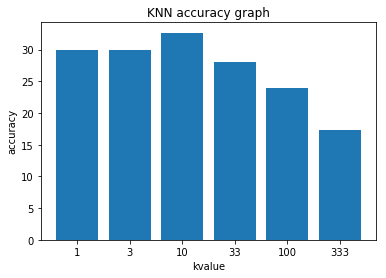

Best kvalue is 10


In [5]:
#plot to find best k value
plt.bar(range(len(kvalue)), acc)
plt.title("KNN accuracy graph")
plt.xlabel("kvalue")
plt.ylabel("accuracy")
plt.xticks(range(len(kvalue)), kvalue)
plt.show()
print("Best kvalue is", kvalue[np.argmax(acc)])

Number of this picture is 5


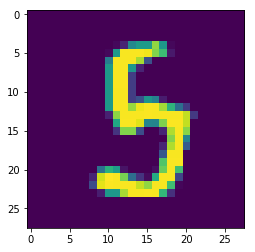

In [11]:
#Visualizing Mnist
X = X_train.reshape(60000, 28, 28)
i = np.random.choice(range(len(X)))
plt.imshow(X[i], interpolation = 'nearest')
print("Number of this picture is", y_train[i])

In [4]:
# CIFAR_10

file_name = 'cifar-10\data_batch_'
datadict = unpickle_trainset_CIFAR_10(file_name)
file_name = 'cifar-10\\test_batch'
testdict = unpickle_testset_CIFAR_10(file_name)
classlist = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

X_train, y_train = datadict[b'data'], np.array(datadict[b'labels'])
X_test, y_test = testdict[b'data'], np.array(testdict[b'labels'])

NN = K_Nearest_Neighbor()
NN.train(X_train, y_train)
acc = []
kvalue = [1, 3, 10, 33, 100, 333]
for k in kvalue:
    acc.append(NN.accuracy(k, X_test[250:250 + 150], y_test[250:250 + 150]) * 100)

k = 1 , 0 iterations finished


KeyboardInterrupt: 

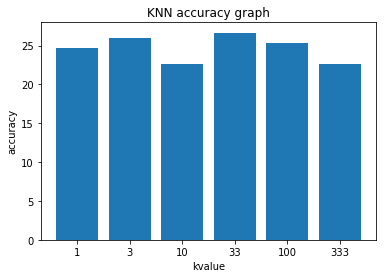

Best kvalue is 33


In [86]:
plt.bar(range(len(kvalue)), acc)
plt.title("KNN accuracy graph")
plt.xlabel("kvalue")
plt.ylabel("accuracy")
plt.xticks(range(len(kvalue)), kvalue)
plt.show()
print("Best kvalue is", kvalue[np.argmax(acc)])

class is cat 3
Kvalue = 56 , predict class is deer


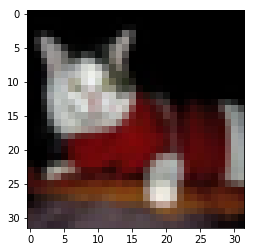

In [87]:
X = X_test.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("uint8")
Y = np.array(y_test)

#Visualizing CIFAR 10
i = np.random.choice(range(len(X)))
k = np.random.choice(range(1, 100))
plt.imshow(X[i], interpolation='nearest')
print("class is", classlist[Y[i]], Y[i])
print("Kvalue =", k, ",", "predict class is", classlist[NN.predict(3, X_test[i])])